<a href="https://colab.research.google.com/github/zs10011598/tmII-2022-II/blob/main/005_FBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Funcion gaussiana 1D: $\ \ \phi(t)=e^{-\frac{|t|^2}{c^2}}$

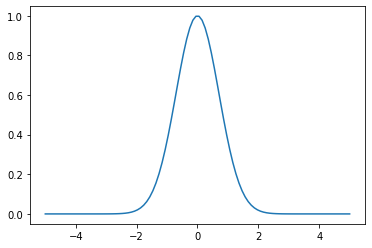

In [3]:
c = 1

t = np.linspace(-5, 5, 100)
y = np.exp(-(t**2/c**2)) ## funcion gaussiana

fig, ax = plt.subplots()

ax.plot(t, y)

* Funcion gaussiana en 2D: $\ \ \ \phi(x) = e^{-\frac{\|x\|^2}{c^2}}$

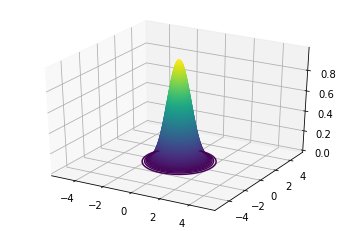

In [8]:
def g(x, y):
  return np.exp(-np.sqrt(x**2 + y**2)**2/c**2)

x, y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
z = g(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour(x, y, z, 200)

Interpolar la funcion $g(x, y) = \sin{(x^2 + y^2}) \ \ $ en el dominio $[-6, 6] \times [-6, 6]$

In [68]:
def g(x, y):
  return np.sin(x**2 + y**2)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


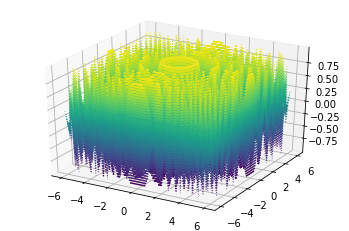

In [69]:
x, y = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
z = g(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour(x, y, z, 40)

utilizando multicuadticos inverso (IMQ) $\phi(x) = (\|x\|^2 + c^2)^{-k}, \ \ k > 0$

In [58]:
def phi(x):
  c = 0.001
  k = 2
  #return (np.linalg.norm(x)**2 + c**2)**(-k)
  return np.exp(-np.linalg.norm(x)**2/c**2)

obtener los puntos aleatorios $x_j$ del dominio

In [59]:
X = -6 + 12*np.random.rand(100)
Y = -6 + 12*np.random.rand(100)

calcular el vector de valores

In [60]:
F = g(X, Y)

construir la matriz de Gram

In [61]:
A = np.array([[phi(np.array(X[j], Y[j]) - np.array(X[k], Y[k])) for k in range(100)] for j in range(100)])

resolviendo mi sistema de ec. lineales

In [62]:
alpha = np.linalg.solve(A, F)

el anzat en los puntos aleatorios es "muy cercano" al vector de valores

In [63]:
np.allclose(np.dot(A, alpha), F)

True

*Ejercicio*: Graficar el anzat